## Fan attendance at NFL Games
**02806 Social data analysis and visualization**

**Group 36**

**Group members:**   
Birkir Fanndal Sturluson s232729 <br>
Brynjar Karl Ævarsson s232736 <br>
Védís Sigríður Ingvarsdóttir <br>

https://chat.openai.com/share/9fdb714e-8c6b-438e-a521-fd93acdc649c


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [100]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [101]:
# Dictionary to map team names to abbreviations
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'OAK',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)



In [102]:
stadium_coordinates["Team"] = stadium_coordinates["Team"].replace('Forty-Niners', '49ers')

stadium_coordinates['team_abbr'] = stadium_coordinates['Team'].map(team_abbr)

In [103]:
games["gameday"] = pd.to_datetime(games['gameday'])
games['year'] = games['gameday'].dt.year


# Filter games for the years 2000 to 2019
game_score_filtered = games[(games['year'] >= 2000) & (games['year'] <= 2019)]

# Filter game_attendance for the years 2000 to 2019
team_data_filtered = game_attendance[(game_attendance['year'] >= 2000) & (game_attendance['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)

# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')

# Merge the stadium coordinates
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_abbr'], right_on=["team_abbr"], how='inner')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\630689048.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
result = final_data[["game_id","season","week","gameday","weekday","wind","temp","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude"]]

In [105]:
result2=result.copy()

In [106]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3983529507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3983529507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
# SD and LAC THE SAME team
team_mapping = {
    'SD': 'LAC',
    # Add other mappings as necessary
}

In [109]:
# STL Land LA THE SAME team
team_mapping2 = {
    'STL': 'LA',
    # Add other mappings as necessary
}

In [110]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)


In [111]:
result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)


In [112]:
result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

In [113]:
result.isna().sum()

game_id                 0
season                  0
week                    0
gameday                 0
weekday                 0
wind                 1131
temp                 1131
home_team               0
away_team               0
home_score              0
away_score              0
stadium                 0
team                    0
team_name               0
weekly_attendance       0
last_name               0
team_abbr               0
Team                    0
longitude               0
latitude                0
winning_team            0
home_team_win           0
dtype: int64

In [116]:
result.nunique()

game_id              4840
season                 20
week                   17
gameday               851
weekday                 7
wind                   37
temp                   98
home_team              32
away_team              32
home_score             59
away_score             54
team                   30
team_name              32
weekly_attendance    3802
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
winning_team           34
home_team_win           2
stadium_name           31
dtype: int64

In [115]:
# Assuming your DataFrame is named result
# Creating a new column 'stadium_name' that combines team abbreviation and 'Stadium' for each stadium name
result['stadium_name'] = result['team_abbr'] + ' Stadium'

# Renaming the stadium name for shared location of NYG/NYJ
result.loc[result['team_abbr'].isin(['NYG', 'NYJ']), 'stadium_name'] = 'NYG/NYJ Stadium'

# Dropping the original 'stadium' column
result.drop(columns=['stadium'], inplace=True)

# Displaying the updated DataFrame
print(result)

              game_id  season  week    gameday weekday  wind  temp home_team  \
1     2000_01_TEN_BUF    2000     1 2000-09-03  Sunday  10.0  73.0       BUF   
2      2000_02_GB_BUF    2000     2 2000-09-10  Sunday   8.0  81.0       BUF   
3     2000_05_IND_BUF    2000     5 2000-10-01  Sunday  10.0  70.0       BUF   
4      2000_07_SD_BUF    2000     7 2000-10-15  Sunday   7.0  63.0       BUF   
5     2000_09_NYJ_BUF    2000     9 2000-10-29  Sunday   6.0  46.0       BUF   
...               ...     ...   ...        ...     ...   ...   ...       ...   
4850  2019_06_PIT_LAC    2019     6 2019-10-13  Sunday   9.0  71.0       LAC   
4851   2019_09_GB_LAC    2019     9 2019-11-03  Sunday   2.0  79.0       LAC   
4852   2019_11_KC_LAC    2019    11 2019-11-18  Monday   7.0  67.0       LAC   
4853  2019_15_MIN_LAC    2019    15 2019-12-15  Sunday  14.0  64.0       LAC   
4854  2019_16_OAK_LAC    2019    16 2019-12-22  Sunday  10.0  64.0       LAC   

     away_team  home_score  ...  team_n

In [74]:
result.to_csv('result.csv', index=None)

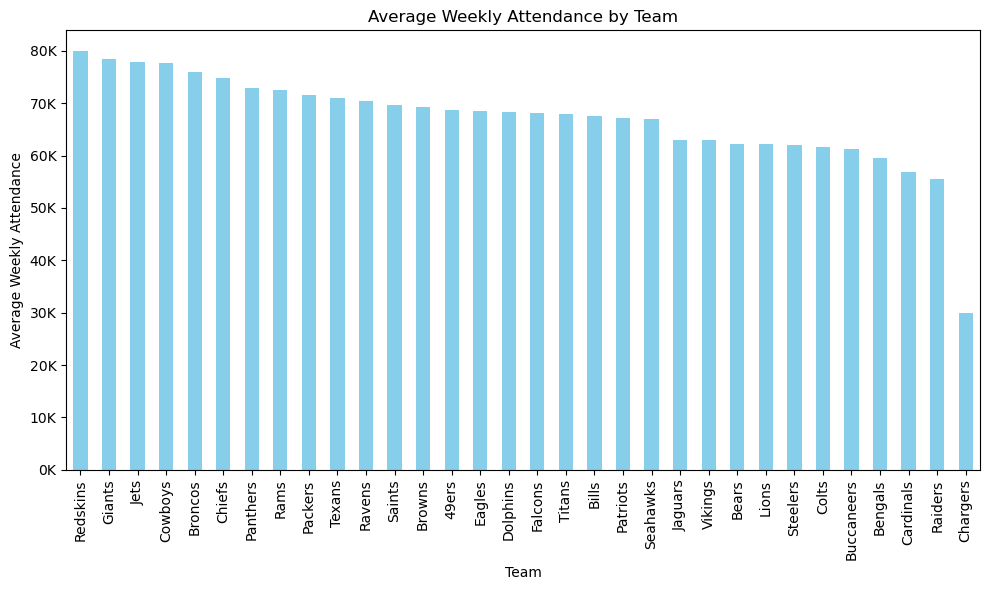

In [117]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

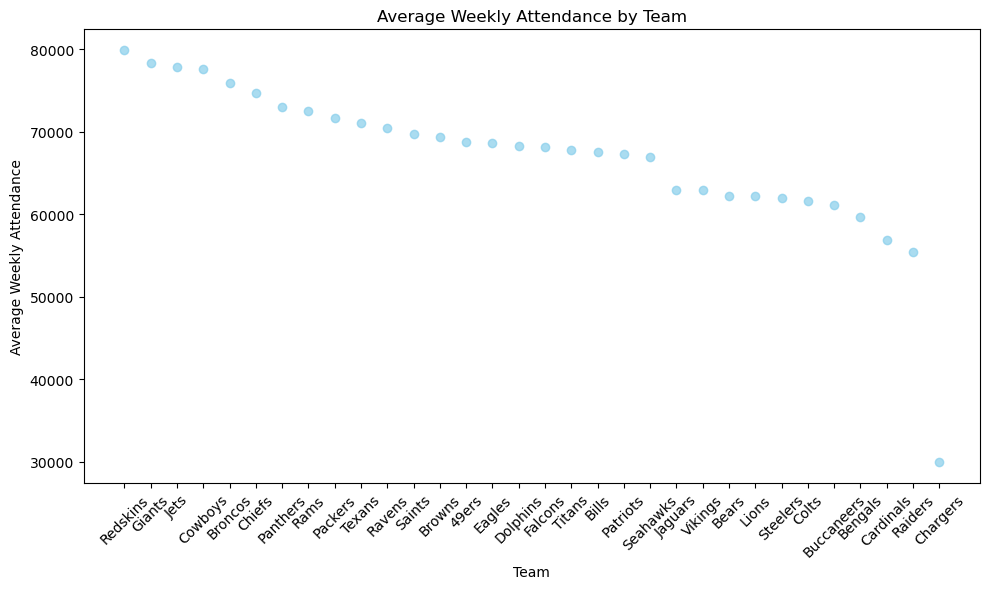

In [118]:
# Generate x and y values for the scatter plot
teams = average_attendance.index
average_attendances = average_attendance.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(teams, average_attendances, color='skyblue', alpha=0.7)

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [119]:
#Calculate the number of wins for each team
home_wins = result[result['home_score'] > result['away_score']]['home_team'].value_counts()
away_wins = result[result['away_score'] > result['home_score']]['away_team'].value_counts()

# Combine home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print(total_wins)
print(sum(total_wins))

NE     233
PIT    200
IND    195
GB     192
PHI    188
BAL    186
NO     177
DEN    173
SEA    172
DAL    165
MIN    162
ATL    161
TEN    159
KC     158
NYG    155
CAR    153
CHI    153
NYJ    145
MIA    144
CIN    141
SF     140
TB     136
BUF    136
WAS    129
HOU    129
ARI    127
JAX    127
OAK    118
DET    114
CLE     98
LAC     83
LA      81
Name: count, dtype: int64
4830


In [120]:
result

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win,stadium_name
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Bills,72492.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Bills,77722.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Bills,72617.0,Bills,BUF,Bills,-78.786978,42.773739,IND,False,BUF Stadium
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Bills,72351.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Bills,72861.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2019_06_PIT_LAC,2019,6,2019-10-13,Sunday,9.0,71.0,LAC,PIT,17.0,...,Chargers,25425.0,Chargers,LAC,Chargers,-117.119525,32.783117,PIT,False,LAC Stadium
4851,2019_09_GB_LAC,2019,9,2019-11-03,Sunday,2.0,79.0,LAC,GB,26.0,...,Chargers,25435.0,Chargers,LAC,Chargers,-117.119525,32.783117,LAC,True,LAC Stadium
4852,2019_11_KC_LAC,2019,11,2019-11-18,Monday,7.0,67.0,LAC,KC,17.0,...,Chargers,76252.0,Chargers,LAC,Chargers,-117.119525,32.783117,KC,False,LAC Stadium
4853,2019_15_MIN_LAC,2019,15,2019-12-15,Sunday,14.0,64.0,LAC,MIN,10.0,...,Chargers,25446.0,Chargers,LAC,Chargers,-117.119525,32.783117,MIN,False,LAC Stadium


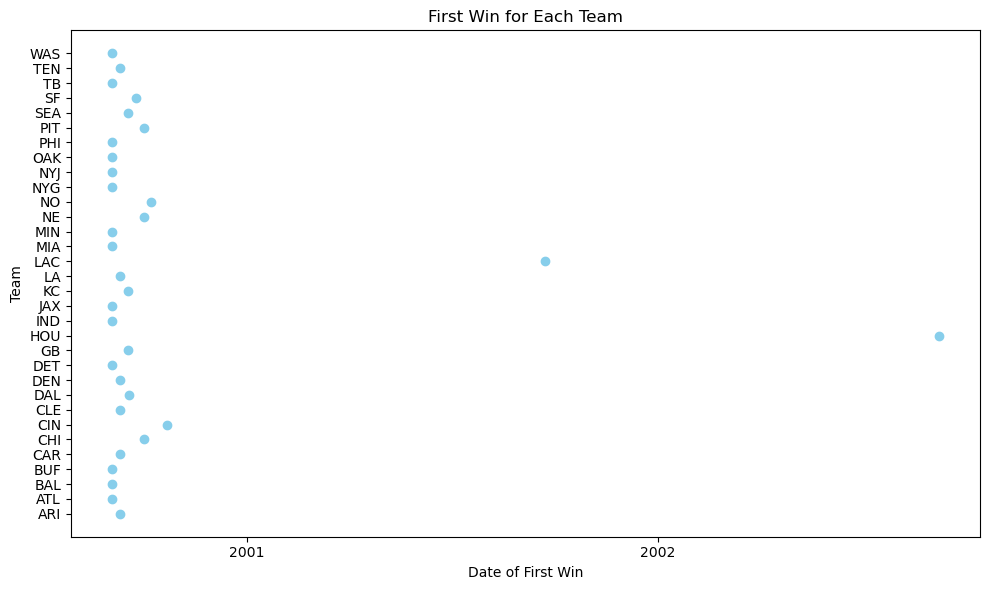

In [121]:
# Find the earliest game where each team won as a home team
home_first_win = result[result['home_score'] > result['away_score']].groupby('home_team')['gameday'].min()

# Find the earliest game where each team won as an away team
away_first_win = result[result['away_score'] > result['home_score']].groupby('away_team')['gameday'].min()

# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(first_wins, first_wins.index, color='skyblue')

# Set plot title and labels
plt.title('First Win for Each Team')
plt.xlabel('Date of First Win')
plt.ylabel('Team')

# Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Show plot
plt.tight_layout()
plt.show()

In [122]:
# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min().reset_index()
first_wins.columns = ['Team', 'First Win']

# Create an interactive scatter plot with Plotly
fig = px.scatter(first_wins, x='First Win', y='Team', hover_data={'First Win': '|%Y-%m-%d'}, color='Team')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(title='First Win for Each Team', xaxis_title='Date of First Win', yaxis_title='Team')
fig.show()


In [124]:
# Create a map centered at a specific location
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Keep track of plotted stadiums
plotted_stadiums = set()

# Filter out rows with NaN values for latitude or longitude
result_filtered = result.dropna(subset=['latitude', 'longitude'])

# Iterate over each row in the filtered DataFrame
for index, row in result_filtered.iterrows():
    stadium = row['stadium_name']
    lat = row['latitude']
    lon = row['longitude']
    
    # Check if the stadium has already been plotted
    if stadium not in plotted_stadiums:
        # Add marker to the map
        folium.Marker(location=[lat, lon], tooltip=stadium).add_to(map)
        
        # Add the stadium to the set of plotted stadiums
        plotted_stadiums.add(stadium)

# Display the map
map

In [125]:
#Er að reyna að litakóða stadiums eftir home fjölda home wins
from branca.colormap import LinearColormap

# Remove rows with NaN values in latitude and longitude columns
result = result.dropna(subset=['latitude', 'longitude'])

# Calculate the total number of home wins for each stadium_name
stadium_home_wins = result[result['home_score'] > result['away_score']].groupby('stadium_name')['home_score'].count()

# Create a map centered at a specific location
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Define a gradient color scale for the number of home wins
color_scale = LinearColormap(colors=['red', 'green'], vmin=stadium_home_wins.min(), vmax=stadium_home_wins.max())

# Iterate over each row in the DataFrame
for stadium_name, wins in stadium_home_wins.items():
    # Get the latitude and longitude of the stadium_name
    lat = result[result['stadium_name'] == stadium_name]['latitude'].iloc[0]
    lon = result[result['stadium_name'] == stadium_name]['longitude'].iloc[0]
    
    # Determine color based on the total home wins for the stadium_name
    color = color_scale(wins)
    
    # Add marker to the map
    folium.Marker(location=[lat, lon], tooltip=f"{stadium_name}: {wins} home wins", icon=folium.Icon(color=color)).add_to(map)

# Add color scale to the map
color_scale.caption = 'Number of Home Wins'
map.add_child(color_scale)

# Display the map
map


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\1137154258.py:26: UserWarning:

color argument of Icon should be one of: {'gray', 'darkred', 'white', 'beige', 'blue', 'red', 'lightgreen', 'darkpurple', 'cadetblue', 'orange', 'darkblue', 'lightgray', 'purple', 'lightblue', 'darkgreen', 'green', 'black', 'pink', 'lightred'}.



In [126]:
import folium
import pandas as pd

# Create a map centered at a specific location
map = folium.Map(location=[39.8283, -98.5795] , zoom_start=4)

# Keep track of plotted stadiums
plotted_stadiums = set()

# Filter out rows with NaN values for latitude or longitude
result_filtered = result.dropna(subset=['latitude', 'longitude'])

# Calculate the number of home wins for each stadium_name
home_wins_per_stadium = result[result['home_team'] == result['winning_team']].groupby('stadium_name').size().reset_index(name='home_wins')

# Find the stadium_name with the most and least wins
max_wins_stadium = home_wins_per_stadium.loc[home_wins_per_stadium['home_wins'].idxmax()]
min_wins_stadium = home_wins_per_stadium.loc[home_wins_per_stadium['home_wins'].idxmin()]

# Iterate over each row in the filtered DataFrame
for index, row in result_filtered.iterrows():
    stadium_name = row['stadium_name']
    lat = row['latitude']
    lon = row['longitude']
    
    # Check if the stadium_name has already been plotted
    if stadium_name not in plotted_stadiums:
        # Determine the color based on the number of wins
        if stadium_name == max_wins_stadium['stadium_name']:
            color = 'green'
        elif stadium_name == min_wins_stadium['stadium_name']:
            color = 'red'
        else:
            # Calculate the normalized win count for intermediate colors
            stadium_wins_query = home_wins_per_stadium.loc[home_wins_per_stadium['stadium_name'] == stadium_name, 'home_wins']
            if not stadium_wins_query.empty:
                stadium_wins = int(stadium_wins_query.iloc[0])
                min_wins = int(min_wins_stadium['home_wins'])
                max_wins = int(max_wins_stadium['home_wins'])
                normalized_wins = (stadium_wins - min_wins) / (max_wins - min_wins)
                # Convert normalized wins to a color value between red and green
                color = '#%02x%02x%02x' % (int(255 * (1 - normalized_wins)), int(255 * normalized_wins), 0)
            else:
                color = 'gray'  # Assign gray color if there are no home wins data for the stadium_name
        
        # Add marker to the map
        folium.Marker(location=[lat, lon], tooltip=stadium_name, icon=folium.Icon(color=color)).add_to(map)
        
        # Add the stadium_name to the set of plotted stadiums
        plotted_stadiums.add(stadium_name)

# Display the map
map


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3624817242.py:47: UserWarning:

color argument of Icon should be one of: {'gray', 'darkred', 'white', 'beige', 'blue', 'red', 'lightgreen', 'darkpurple', 'cadetblue', 'orange', 'darkblue', 'lightgray', 'purple', 'lightblue', 'darkgreen', 'green', 'black', 'pink', 'lightred'}.



In [84]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

print(wins_per_season)


     season winning_team  wins
0      2000          ARI     3
1      2000          ATL     4
2      2000          BAL    12
3      2000          BUF     8
4      2000          CAR     6
..      ...          ...   ...
630    2019          SEA    11
631    2019           SF    13
632    2019           TB     7
633    2019          TEN     9
634    2019          WAS     3

[635 rows x 3 columns]


In [85]:
result

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Buffalo,Bills,72492.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Buffalo,Bills,77722.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Buffalo,Bills,72617.0,Bills,BUF,Bills,-78.786978,42.773739,IND,False
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Buffalo,Bills,72351.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Buffalo,Bills,72861.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2019_06_PIT_LAC,2019,6,2019-10-13,Sunday,9.0,71.0,LAC,PIT,17.0,...,Los Angeles,Chargers,25425.0,Chargers,LAC,Chargers,-117.119525,32.783117,PIT,False
4851,2019_09_GB_LAC,2019,9,2019-11-03,Sunday,2.0,79.0,LAC,GB,26.0,...,Los Angeles,Chargers,25435.0,Chargers,LAC,Chargers,-117.119525,32.783117,LAC,True
4852,2019_11_KC_LAC,2019,11,2019-11-18,Monday,7.0,67.0,LAC,KC,17.0,...,Los Angeles,Chargers,76252.0,Chargers,LAC,Chargers,-117.119525,32.783117,KC,False
4853,2019_15_MIN_LAC,2019,15,2019-12-15,Sunday,14.0,64.0,LAC,MIN,10.0,...,Los Angeles,Chargers,25446.0,Chargers,LAC,Chargers,-117.119525,32.783117,MIN,False


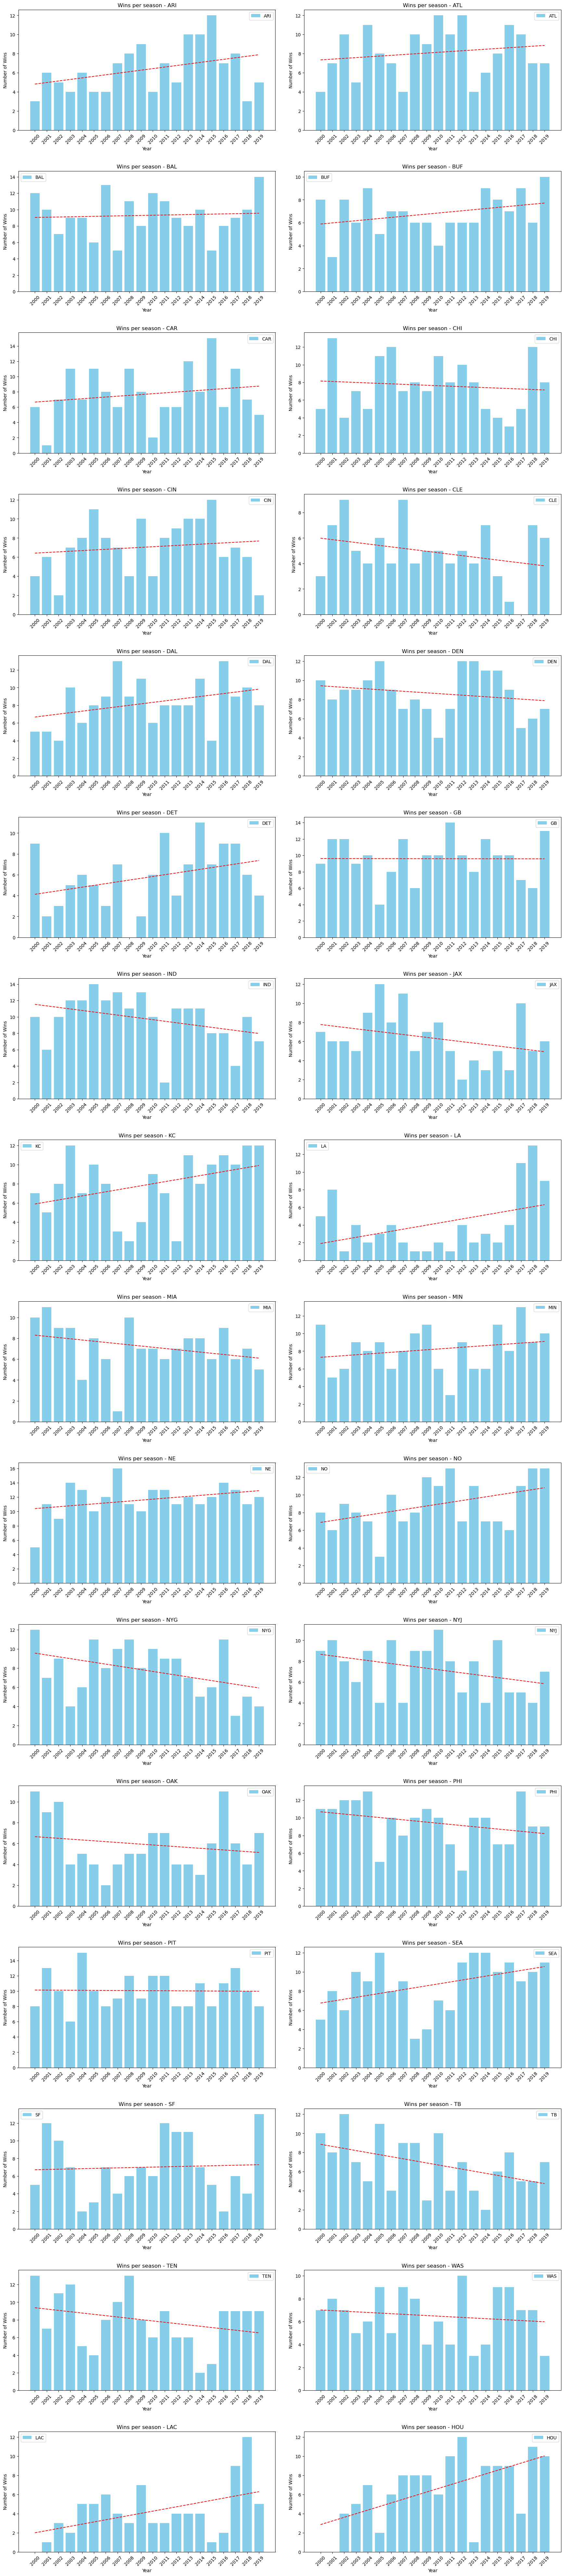

In [127]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Pivot the table to have teams as columns and years as rows
wins_pivot = wins_per_season.pivot(index='season', columns='winning_team', values='wins').fillna(0)

# Plot each team separately
teams = wins_per_season['winning_team'].unique()
num_teams = len(teams)
num_cols = 2  # Number of columns for subplots
num_rows = (num_teams + 1) // num_cols  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    ax.bar(wins_pivot.index, wins_pivot[team], label=team, color='skyblue')
    ax.set_title(f'Wins per season - {team}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Wins')
    ax.legend()

    # Calculate trendline using linear regression
    x = np.array(wins_pivot.index).reshape(-1, 1)
    y = wins_pivot[team].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    trendline = model.predict(x)
    ax.plot(wins_pivot.index, trendline, color='red', linestyle='--', label='Trendline')

    ax.set_xticks(wins_pivot.index)
    ax.set_xticklabels(wins_pivot.index, rotation=45)

    # Set y-ticks to display only even numbers
    y_ticks = np.arange(0, max(wins_pivot[team]) + 1, 2)
    ax.set_yticks(y_ticks)

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()

In [128]:
result[:10]

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win,stadium_name
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Bills,72492.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Bills,77722.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Bills,72617.0,Bills,BUF,Bills,-78.786978,42.773739,IND,False,BUF Stadium
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Bills,72351.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Bills,72861.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
6,2000_11_CHI_BUF,2000,11,2000-11-12,Sunday,10.0,40.0,BUF,CHI,20.0,...,Bills,72420.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
7,2000_14_MIA_BUF,2000,14,2000-12-03,Sunday,6.0,27.0,BUF,MIA,6.0,...,Bills,73002.0,Bills,BUF,Bills,-78.786978,42.773739,MIA,False,BUF Stadium
8,2000_16_NE_BUF,2000,16,2000-12-17,Sunday,25.0,35.0,BUF,NE,10.0,...,Bills,47230.0,Bills,BUF,Bills,-78.786978,42.773739,NE,False,BUF Stadium
9,2001_01_NO_BUF,2001,1,2001-09-09,Sunday,10.0,87.0,BUF,NO,6.0,...,Bills,71447.0,Bills,BUF,Bills,-78.786978,42.773739,NO,False,BUF Stadium
10,2001_03_PIT_BUF,2001,3,2001-09-30,Sunday,7.0,63.0,BUF,PIT,3.0,...,Bills,72874.0,Bills,BUF,Bills,-78.786978,42.773739,PIT,False,BUF Stadium


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3722935137.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20952\3722935137.py:26: UserWarning:

The figure layout has changed to tight



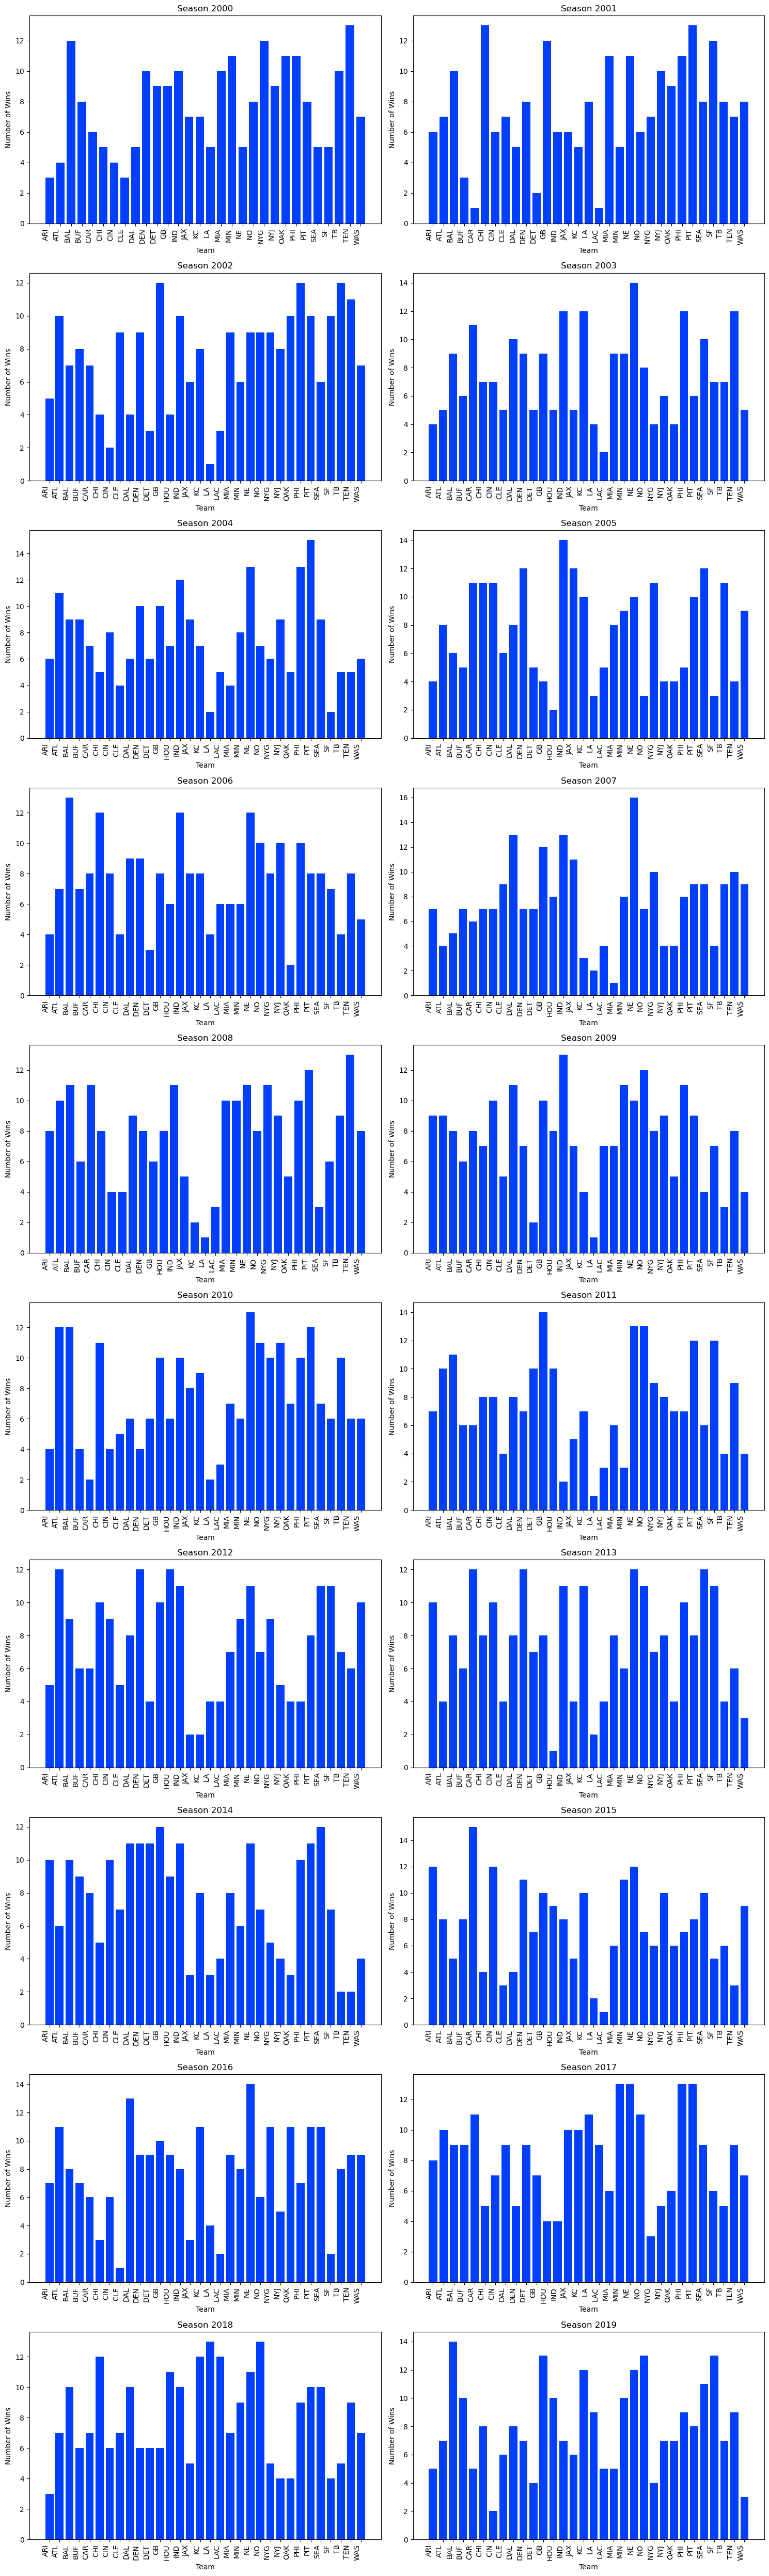

In [129]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Get unique seasons
seasons = wins_per_season['season'].unique()

# Calculate the number of rows needed for subplots
num_rows = len(seasons) // 2 + (len(seasons) % 2 > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate through each season and create a graph
for idx, season in enumerate(seasons):
    season_data = wins_per_season[wins_per_season['season'] == season]
    ax = axes[idx // 2, idx % 2]
    ax.bar(season_data['winning_team'], season_data['wins'])
    ax.set_title(f'Season {int(season)}')
    ax.set_xlabel('Team')
    ax.set_ylabel('Number of Wins')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(season_data['winning_team'], rotation=90, ha='right')
    plt.tight_layout()

# Hide empty subplots
if len(seasons) % 2 != 0:
    for i in range(len(seasons) % 2, 2):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()


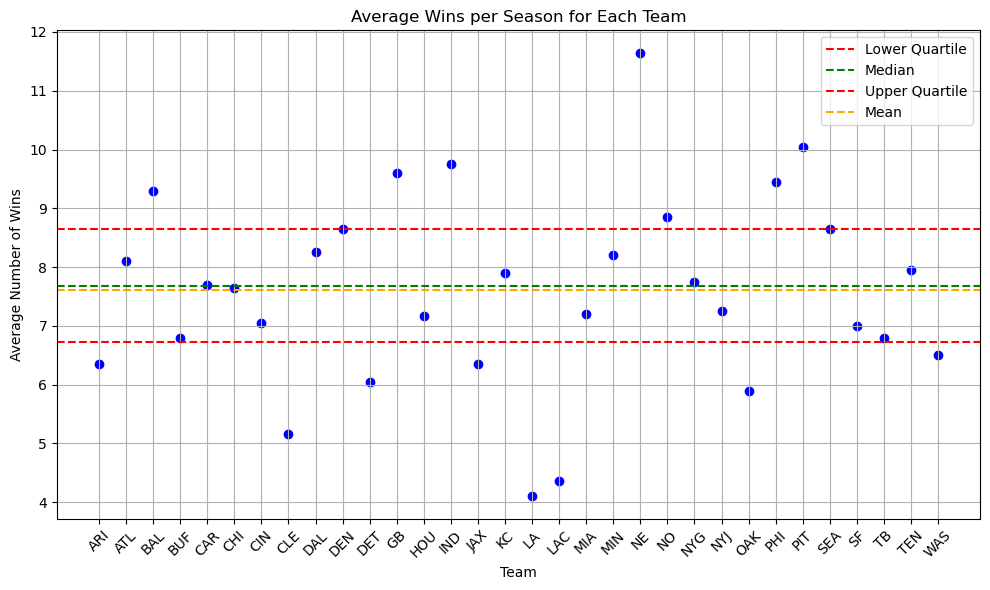

In [130]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Calculate the average number of wins per season for each team
average_wins_per_team = wins_per_season.groupby('winning_team')['wins'].mean().reset_index()

# Calculate quartiles and median
lower_quartile = np.percentile(average_wins_per_team['wins'], 25)
median = np.percentile(average_wins_per_team['wins'], 50)
upper_quartile = np.percentile(average_wins_per_team['wins'], 75)
mean = average_wins_per_team['wins'].mean()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_wins_per_team['winning_team'], average_wins_per_team['wins'], color='blue')
plt.title('Average Wins per Season for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)

# Add quartiles and mean lines
plt.axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
plt.axhline(y=median, color='g', linestyle='--', label='Median')
plt.axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
plt.axhline(y=mean, color='orange', linestyle='--', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()


In [131]:
# Correlation between temperature and weekly attendance
# Calculate correlation matrix
correlation_matrix = result[['temp', 'weekly_attendance']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       temp  weekly_attendance
temp               1.000000          -0.113121
weekly_attendance -0.113121           1.000000


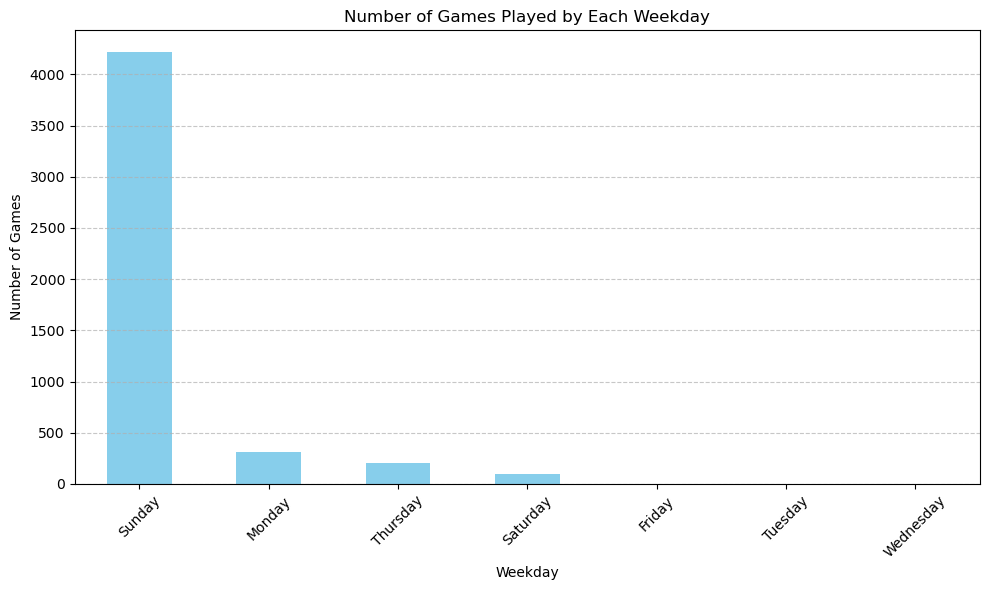

In [132]:
# Convert the "gameday" column to datetime format
result['gameday'] = pd.to_datetime(result['gameday'])

# Extract the weekday from the "gameday" column
result['weekday'] = result['gameday'].dt.day_name()

# Count the number of games for each weekday
games_by_weekday = result['weekday'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
games_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Number of Games Played by Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [133]:
total_wins

NE     233
PIT    200
IND    195
GB     192
PHI    188
BAL    186
NO     177
DEN    173
SEA    172
DAL    165
MIN    162
ATL    161
TEN    159
KC     158
NYG    155
CAR    153
CHI    153
NYJ    145
MIA    144
CIN    141
SF     140
TB     136
BUF    136
WAS    129
HOU    129
ARI    127
JAX    127
OAK    118
DET    114
CLE     98
LAC     83
LA      81
Name: count, dtype: int64

In [134]:
# Create a DataFrame containing both home and away games
home_games = result.groupby(['season', 'home_team']).size().reset_index(name='home_games_played')
away_games = result.groupby(['season', 'away_team']).size().reset_index(name='away_games_played')

# Merge the home and away game DataFrames on team and season
games_per_season_per_team = pd.merge(home_games, away_games, left_on=['season', 'home_team'], right_on=['season', 'away_team'], how='outer')

# Fill NaN values with 0
games_per_season_per_team = games_per_season_per_team.fillna(0)

# Add the home and away games to get the total games played by each team in each season
games_per_season_per_team['total_games_played'] = (games_per_season_per_team['home_games_played'] + games_per_season_per_team['away_games_played']).astype(int)

# Drop unnecessary columns
games_per_season_per_team = games_per_season_per_team[['season', 'home_team', 'total_games_played']]

# Rename columns for consistency
games_per_season_per_team.rename(columns={'home_team': 'team_abbr'}, inplace=True)

# Display the result
print(games_per_season_per_team)

     season team_abbr  total_games_played
0      2000       ARI                  16
1      2000       ATL                  15
2      2000       BAL                  16
3      2000       BUF                  16
4      2000       CAR                  15
..      ...       ...                 ...
633    2014         0                   7
634    2014         0                   8
635    2015         0                   8
636    2015         0                   8
637    2016         0                   8

[638 rows x 3 columns]


In [135]:
games_per_season_per_team.iloc[-75:]

,season,team_abbr,total_games_played
563,2018,NYG,16
564,2018,NYJ,16
565,2018,OAK,16
566,2018,PHI,16
567,2018,PIT,16
...,...,...,...
633,2014,0,7
634,2014,0,8
635,2015,0,8
636,2015,0,8


Afhverju eru sum Abbr 0????????

In [136]:
# Create a DataFrame containing both home and away games
home_games = result.groupby(['season', 'home_team']).size().reset_index(name='home_games_played')
away_games = result.groupby(['season', 'away_team']).size().reset_index(name='away_games_played')

# Merge the home and away game DataFrames on team and season
games_per_season_per_team = pd.merge(home_games, away_games, left_on=['season', 'home_team'], right_on=['season', 'away_team'], how='outer')

# Fill NaN values with 0
games_per_season_per_team = games_per_season_per_team.fillna(0)

# Add the home and away games to get the total games played by each team in each season
games_per_season_per_team['total_games_played'] = (games_per_season_per_team['home_games_played'] + games_per_season_per_team['away_games_played']).astype(int)

# Drop unnecessary columns
games_per_season_per_team = games_per_season_per_team[['season', 'home_team', 'total_games_played']]

# Rename columns for consistency
games_per_season_per_team.rename(columns={'home_team': 'team_abbr'}, inplace=True)

# Calculate total number of wins for each team in each season
total_wins_per_team_season = result.groupby(['season', 'winning_team']).size().reset_index(name='total_wins')

# Merge total wins with total games played
team_season_stats = pd.merge(games_per_season_per_team, total_wins_per_team_season, left_on=['season', 'team_abbr'], right_on=['season', 'winning_team'], how='left')

# Calculate win percentage for each team in each season
team_season_stats['win_percentage'] = (team_season_stats['total_wins'] / team_season_stats['total_games_played']) * 100

# Drop redundant columns
team_season_stats.drop(columns=['winning_team'], inplace=True)

# Display the result
print(team_season_stats)

     season team_abbr  total_games_played  total_wins  win_percentage
0      2000       ARI                  16         3.0       18.750000
1      2000       ATL                  15         4.0       26.666667
2      2000       BAL                  16        12.0       75.000000
3      2000       BUF                  16         8.0       50.000000
4      2000       CAR                  15         6.0       40.000000
..      ...       ...                 ...         ...             ...
633    2014         0                   7         NaN             NaN
634    2014         0                   8         NaN             NaN
635    2015         0                   8         NaN             NaN
636    2015         0                   8         NaN             NaN
637    2016         0                   8         NaN             NaN

[638 rows x 5 columns]


In [137]:
team_season_stats[:30]

,season,team_abbr,total_games_played,total_wins,win_percentage
0,2000,ARI,16,3.0,18.750000
1,2000,ATL,15,4.0,26.666667
2,2000,BAL,16,12.0,75.000000
3,2000,BUF,16,8.0,50.000000
4,2000,CAR,15,6.0,40.000000
5,2000,CHI,16,5.0,31.250000
6,2000,CIN,16,4.0,25.000000
7,2000,CLE,16,3.0,18.750000
8,2000,DAL,16,5.0,31.250000
9,2000,DEN,14,10.0,71.428571


In [138]:
# Filter rows where home_score equals away_score
equal_scores = result[result['home_score'] == result['away_score']]

# Display the result
equal_scores

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win,stadium_name
915,2013_12_MIN_GB,2013,12,2013-11-24,Sunday,10.0,19.0,GB,MIN,26.0,...,Packers,77871.0,Packers,GB,Packers,-88.062167,44.501306,MIN,False,GB Stadium
951,2018_02_MIN_GB,2018,2,2018-09-16,Sunday,5.0,80.0,GB,MIN,29.0,...,Packers,78461.0,Packers,GB,Packers,-88.062167,44.501306,MIN,False,GB Stadium
1953,2002_10_ATL_PIT,2002,10,2002-11-10,Sunday,15.0,64.0,PIT,ATL,34.0,...,Steelers,62779.0,Steelers,PIT,Steelers,-80.015761,40.446786,ATL,False,PIT Stadium
2559,2018_01_PIT_CLE,2018,1,2018-09-09,Sunday,11.0,58.0,CLE,PIT,21.0,...,Browns,67431.0,Browns,CLE,Browns,-81.699564,41.506022,PIT,False,CLE Stadium
3603,2008_11_PHI_CIN,2008,11,2008-11-16,Sunday,15.0,38.0,CIN,PHI,13.0,...,Bengals,64633.0,Bengals,CIN,Bengals,-84.516039,39.095442,PHI,False,CIN Stadium
3649,2014_06_CAR_CIN,2014,6,2014-10-12,Sunday,5.0,60.0,CIN,CAR,37.0,...,Bengals,57053.0,Bengals,CIN,Bengals,-84.516039,39.095442,CAR,False,CIN Stadium
3666,2016_08_WAS_CIN,2016,8,2016-10-30,Sunday,2.0,54.0,CIN,WAS,27.0,...,Bengals,84488.0,Bengals,CIN,Bengals,-84.516039,39.095442,WAS,False,CIN Stadium
4435,2012_10_STL_SF,2012,10,2012-11-11,Sunday,5.0,55.0,SF,LA,24.0,...,49ers,69732.0,49ers,SF,49ers,-122.386256,37.713486,LA,False,SF Stadium
4627,2016_07_SEA_ARI,2016,7,2016-10-23,Sunday,NaN,NaN,ARI,SEA,6.0,...,Cardinals,65089.0,Cardinals,ARI,Cardinals,-112.262608,33.527700,SEA,False,ARI Stadium
4647,2019_01_DET_ARI,2019,1,2019-09-08,Sunday,NaN,NaN,ARI,DET,27.0,...,Cardinals,60687.0,Cardinals,ARI,Cardinals,-112.262608,33.527700,DET,False,ARI Stadium


In [139]:
# Get unique team abbreviations
teams = team_season_stats['team_abbr'].unique()

# Calculate quartiles and mean
lower_quartile = team_season_stats['win_percentage'].quantile(0.25)
median = team_season_stats['win_percentage'].quantile(0.5)
upper_quartile = team_season_stats['win_percentage'].quantile(0.75)
mean = team_season_stats['win_percentage'].mean()

# Create subplots for each team
fig, axs = plt.subplots(len(teams), 1, figsize=(10, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    team_data = team_season_stats[team_season_stats['team_abbr'] == team]
    axs[i].scatter(team_data.index, team_data['win_percentage'], color='blue', s=50, alpha=0.7)
    axs[i].set_title(f'Win Percentage Distribution for {team}')
    axs[i].set_ylabel('Win Percentage')
    axs[i].axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
    axs[i].axhline(y=median, color='g', linestyle='--', label='Median')
    axs[i].axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
    axs[i].axhline(y=mean, color='orange', linestyle='--', label='Mean')
    axs[i].legend()

plt.xlabel('Team Index')
plt.xticks(range(len(team_season_stats)), team_season_stats['team_abbr'], rotation=45)
plt.tight_layout()
plt.show()